#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [6]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
data = pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa apakah ada missing values

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

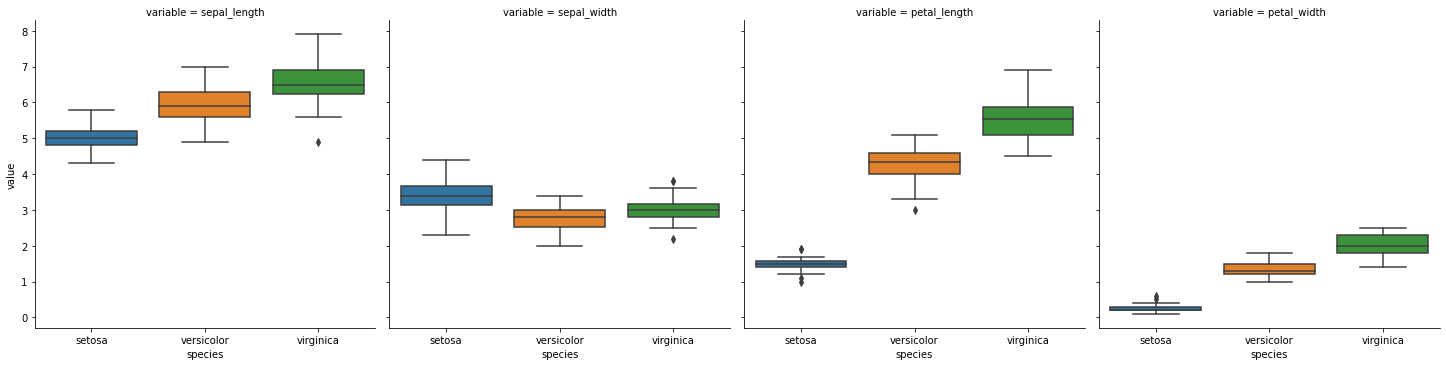

In [15]:
iris = data.melt(id_vars='species')
sns.catplot(data=iris, x='species', y='value',col='variable', kind='box', col_wrap=4)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [16]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
x_pred = classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, x_pred))

Accuracy Score:  0.9333333333333333


Uji model dengan dataset test

In [20]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica']


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 5 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [22]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [23]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 5 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [25]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [26]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[6 0 0]
 [0 5 0]
 [0 1 3]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah semuanya memiliki tingkat akurasi yang sama